In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from IPython import display
import plotly as plotly
%matplotlib inline



import calendar
import datetime as dt
from datetime import timedelta, date
from pprint import pprint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


import joblib
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

from scipy.stats import randint as sp_randint
from time import time
import pickle

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: ignored

In [ ]:
# !pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
random_state = 123

In [ ]:
# importing libraries
import os
import pandas as pd
import numpy as np
import glob
import psycopg2
import sqlalchemy
import shutil
import glob
import warnings
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

import plotly.express as px


warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('df_for_ml.csv')
df

,Time,load
0,2020-01-01 19:14:00,9.877
1,2020-01-01 19:15:00,9.821
2,2020-01-01 19:16:00,9.831
3,2020-01-01 19:17:00,9.810
4,2020-01-01 19:18:00,9.808
...,...,...
523535,2021-01-02 19:09:00,11.165
523536,2021-01-02 19:10:00,11.185
523537,2021-01-02 19:11:00,11.190
523538,2021-01-02 19:12:00,10.467


In [ ]:
df['Time'] =  pd.to_datetime(df['Time'])
# df['Time'] = df['Time'].dt.tz_convert(None)

# df

# df2

# dfs = df.append([df2])
# dfs

# dfs.drop_duplicates(subset=['Time'], keep='last', inplace=True)

# dfs.to_csv('EHM21120502-2022-11-08T11-19-29+0100-5min.csv',index=False)

In [ ]:
col_to_interpolate = ['Freq_Hz', 'Va_V', 'Vb_V', 'Vc_V', 'Vnavg_V', 'Vab_V', 'Vbc_V', 'Vca_V', 'Vlavg_V', 'Ia_A', 'Ib_A', 'Ic_A', 'Iavg_A', 'PFa', 'PFb', 'PFc', 'PF', 'I001_A', 'PF001', 'I002_A',
 'PF002', 'I003_A', 'PF003', 'I004_A', 'PF004', 'I005_A', 'PF005', 'I006_A', 'PF006', 'I007_A', 'PF007', 'I008_A', 'PF008', 'I009_A', 'PF009', 'PFs1', 'PFs2', 'PFs3',
  'Qa_kvar', 'Qb_kvar', 'Qc_kvar', 'Q_kvar', 'Sa_kVA', 'Sb_kVA', 'Sc_kVA', 'S_kVA', 'Q001_kvar', 'S001_kVA',
 'Q002_kvar', 'S002_kVA','Q003_kvar', 'S003_kVA',  'Q004_kvar', 'S004_kVA', 'Q005_kvar', 'S005_kVA', 'Q006_kvar', 'S006_kVA',
 'Q007_kvar', 'S007_kVA', 'Q008_kvar', 'S008_kVA',  'Q009_kvar', 'S009_kVA',  'Qs1_kvar', 'Ss1_kVA',  'Qs2_kvar', 'Ss2_kVA',
  'Qs3_kvar', 'Ss3_kVA']

col_for_ml = ['Pa_kW', 'Pb_kW','Pc_kW',  'P_kW', 'P001_kW', 'P002_kW', 'P003_kW', 'P004_kW', 'P005_kW', 'P006_kW', 'P007_kW','P008_kW', 'P009_kW','Ps1_kW','Ps2_kW','Ps3_kW']


for i in list(df[col_to_interpolate].columns):
    df[i]= df[i].abs()

for i in list(df[col_for_ml].columns):
    df[i]= df[i].abs()

df = df.drop_duplicates(keep='first')
df

,Time,Freq_Hz,Va_V,Vb_V,Vc_V,Vnavg_V,Vab_V,Vbc_V,Vca_V,Vlavg_V,...,Ps1_kW,Qs1_kvar,Ss1_kVA,Ps2_kW,Qs2_kvar,Ss2_kVA,Ps3_kW,Qs3_kvar,Ss3_kVA,site
0,2020-01-01 19:14:00,50.265,230.980,235.891,232.542,233.138,403.888,405.700,400.954,403.514,...,9.877,0.938,11.199,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran
1,2020-01-01 19:15:00,50.245,230.732,235.717,232.269,232.906,403.748,405.429,400.476,403.218,...,9.821,0.938,11.188,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran
2,2020-01-01 19:16:00,50.235,230.800,235.652,232.404,232.952,403.390,405.383,400.622,403.132,...,9.830,0.920,11.204,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran
3,2020-01-01 19:17:00,50.226,230.757,235.668,232.325,232.917,403.550,405.387,400.713,403.217,...,9.817,0.920,11.213,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran
4,2020-01-01 19:18:00,50.226,230.668,235.584,232.301,232.851,403.324,405.228,400.501,403.018,...,9.808,0.920,11.176,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523535,2021-01-02 19:09:00,50.167,237.479,242.548,238.017,239.348,415.406,416.257,411.467,414.377,...,11.165,1.040,12.419,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran
523536,2021-01-02 19:10:00,50.117,237.501,242.592,238.067,239.386,415.589,416.242,411.573,414.468,...,11.185,1.022,12.422,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran
523537,2021-01-02 19:11:00,50.108,237.654,242.760,238.304,239.573,415.592,416.538,411.825,414.652,...,11.190,1.039,12.457,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran
523538,2021-01-02 19:12:00,49.932,237.605,242.646,238.818,239.690,415.602,417.082,411.994,414.893,...,10.467,1.139,11.123,0.0,0.0,0.0,0.0,0.0,0.0,Oba akran


In [ ]:
df.drop_duplicates(subset=['Time'], keep='last', inplace=True)

In [ ]:
# df.to_csv('df.csv', index=False)
df['system_kW'] = df.P001_kW + df.P002_kW + df.P003_kW + df.P004_kW + df.P005_kW + df.P006_kW + df.P007_kW +df.P008_kW + df.P009_kW

In [ ]:
df = df[['Time','system_kW']]
# df_for_ML.to_csv('df_for_ml.csv', index=False)

In [ ]:
def time_adjust(df):
    df = df.reset_index()
    df['Time'] = df['Time'].astype(str)
    df['Time']= pd.to_datetime(df['Time'])
    df.sort_values(by='Time', inplace=True)
    return df

def time_indexing(df):
    df = df.set_index('Time')
    df.index = pd.to_datetime(df.index)
    return df

In [ ]:
df

,Time,system_kW
0,2020-01-01 19:14:00,9.877
1,2020-01-01 19:15:00,9.821
2,2020-01-01 19:16:00,9.831
3,2020-01-01 19:17:00,9.810
4,2020-01-01 19:18:00,9.808
...,...,...
523535,2021-01-02 19:09:00,11.165
523536,2021-01-02 19:10:00,11.185
523537,2021-01-02 19:11:00,11.190
523538,2021-01-02 19:12:00,10.467


In [ ]:
# data re-sampled based on an hour
df_by_hr_max = df.resample('H', on='Time').system_kW.max()

df_by_hr_max = pd.DataFrame(df_by_hr_max).reset_index()

df_by_hr_max.rename(columns = {'system_kW':'Max_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_max["Time"].dt.isocalendar()
df_by_hr_max["week_date"] = (df_by_hr_max['Time'] - pd.to_timedelta(df_by_hr_max['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_max["week_date"] = df_by_hr_max["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
df_by_hr_max

# data re-sampled based on an hour
df_by_hr_min = df.resample('H', on='Time').system_kW.min()

df_by_hr_min = pd.DataFrame(df_by_hr_min).reset_index()

df_by_hr_min.rename(columns = {'system_kW':'Min_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_min["Time"].dt.isocalendar()
df_by_hr_min["week_date"] = (df_by_hr_min['Time'] - pd.to_timedelta(df_by_hr_min['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_min["week_date"] = df_by_hr_min["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
Min_Load = df_by_hr_min.Min_Load.to_list()

# data re-sampled based on an hour
df_by_hr_mean = df.resample('H', on='Time').system_kW.mean()

df_by_hr_mean = pd.DataFrame(df_by_hr_mean).reset_index()

df_by_hr_mean.rename(columns = {'system_kW':'Mean_Load'}, inplace = True)

import pandas as pd

# Get week number, with pd.DateOffset used to start the week on Sunday
week_date_values = df_by_hr_mean["Time"].dt.isocalendar()
df_by_hr_mean["week_date"] = (df_by_hr_mean['Time'] - pd.to_timedelta(df_by_hr_mean['Time'].dt.dayofweek, unit='d') + pd.DateOffset(days=-1)).dt.strftime("%Y-%m-%d")

# Combine with "(week n)" values
df_by_hr_mean["week_date"] = df_by_hr_mean["week_date"] + " " + "(week " + week_date_values["week"].astype(str) + ")"
Mean_Load = df_by_hr_mean.Mean_Load.to_list()

df_max_min_mean = df_by_hr_max.assign(Min_Load=Min_Load,Mean_Load=Mean_Load)

df_hr_max_min_mean = df_max_min_mean[['Time','week_date','Max_Load','Min_Load','Mean_Load']]

df_hr_max_min_mean

,Time,week_date,Max_Load,Min_Load,Mean_Load
0,2020-01-01 19:00:00,2019-12-29 (week 1),9.930,9.808,9.855870
1,2020-01-01 20:00:00,2019-12-29 (week 1),9.870,9.727,9.803250
2,2020-01-01 21:00:00,2019-12-29 (week 1),11.638,9.728,11.166733
3,2020-01-01 22:00:00,2019-12-29 (week 1),11.503,11.320,11.400533
4,2020-01-01 23:00:00,2019-12-29 (week 1),11.419,8.853,10.381850
...,...,...,...,...,...
8804,2021-01-02 15:00:00,2020-12-27 (week 53),12.647,11.088,11.339983
8805,2021-01-02 16:00:00,2020-12-27 (week 53),14.608,9.756,11.961717
8806,2021-01-02 17:00:00,2020-12-27 (week 53),12.687,9.738,11.015783
8807,2021-01-02 18:00:00,2020-12-27 (week 53),11.176,9.504,10.625717


In [ ]:
temp = pd.read_csv(r"C:\Users\Tobi\Desktop\Load Prediction\temptemp.csv")
temp

,YEAR,MO,DY,HR,T2M,T2MDEW,T2MWET
0,2020,1,1,0,24.65,18.48,21.57
1,2020,1,1,1,23.67,18.55,21.11
2,2020,1,1,2,22.95,18.48,20.71
3,2020,1,1,3,22.26,18.36,20.30
4,2020,1,1,4,21.50,18.15,19.83
...,...,...,...,...,...,...,...
17538,2021,12,31,19,26.26,24.03,25.15
17539,2021,12,31,20,26.06,23.96,25.01
17540,2021,12,31,21,25.86,23.94,24.90
17541,2021,12,31,22,25.67,23.98,24.83


In [ ]:
temp = temp[temp['T2M']>0]

In [ ]:


# create a new column for datetime as string with desired format using YEAR, MO, DY, and HR columns
temp['datetime'] = temp['YEAR'].astype(str) + '-' + temp['MO'].astype(str).str.zfill(2) + '-' + temp['DY'].astype(str).str.zfill(2) + ' ' + temp['HR'].astype(str).str.zfill(2)

# drop the individual YEAR, MO, DY, and HR columns
temp.drop(['YEAR', 'MO', 'DY', 'HR'], axis=1, inplace=True)

temp


,T2M,T2MDEW,T2MWET,datetime
0,24.65,18.48,21.57,2020-01-01 00
1,23.67,18.55,21.11,2020-01-01 01
2,22.95,18.48,20.71,2020-01-01 02
3,22.26,18.36,20.30,2020-01-01 03
4,21.50,18.15,19.83,2020-01-01 04
...,...,...,...,...
17538,26.26,24.03,25.15,2021-12-31 19
17539,26.06,23.96,25.01,2021-12-31 20
17540,25.86,23.94,24.90,2021-12-31 21
17541,25.67,23.98,24.83,2021-12-31 22


In [ ]:
# temp['datetime'] =
temp['datetime'] =  pd.to_datetime(temp['datetime'])

In [ ]:
temp

,T2M,T2MDEW,T2MWET,datetime
0,24.65,18.48,21.57,2020-01-01 00:00:00
1,23.67,18.55,21.11,2020-01-01 01:00:00
2,22.95,18.48,20.71,2020-01-01 02:00:00
3,22.26,18.36,20.30,2020-01-01 03:00:00
4,21.50,18.15,19.83,2020-01-01 04:00:00
...,...,...,...,...
17538,26.26,24.03,25.15,2021-12-31 19:00:00
17539,26.06,23.96,25.01,2021-12-31 20:00:00
17540,25.86,23.94,24.90,2021-12-31 21:00:00
17541,25.67,23.98,24.83,2021-12-31 22:00:00


In [ ]:
# convert the time columns in both tables to datetime format
df['Time'] = pd.to_datetime(df['Time'])
temp['datetime'] = pd.to_datetime(temp['datetime'])

# merge the tables on the Time column from df and the datetime column from temp
merged_table = pd.merge(df, temp, left_on='Time', right_on='datetime', how='inner')

# drop the datetime column from the merged table
merged_table.drop('datetime', axis=1, inplace=True)

merged_table

,Time,system_kW,T2M,T2MDEW,T2MWET
0,2020-01-01 20:00:00,9.852,26.06,19.48,22.76
1,2020-01-01 21:00:00,9.836,25.66,19.51,22.58
2,2020-01-01 22:00:00,11.481,25.14,19.46,22.30
3,2020-01-01 23:00:00,11.418,24.56,19.26,21.91
4,2020-01-02 00:00:00,9.166,23.87,19.10,21.49
...,...,...,...,...,...
8724,2021-01-02 15:00:00,11.242,28.57,25.55,27.06
8725,2021-01-02 16:00:00,11.237,28.20,25.73,26.97
8726,2021-01-02 17:00:00,11.178,27.49,25.69,26.58
8727,2021-01-02 18:00:00,11.147,27.15,25.48,26.31


In [ ]:
merged_table['system_kW']

0        9.852
1        9.836
2       11.481
3       11.418
4        9.166
         ...  
8724    11.242
8725    11.237
8726    11.178
8727    11.147
8728    11.075
Name: system_kW, Length: 8729, dtype: float64

##### TEST FOR DEPENDENCE

In [ ]:
df = merged_table.copy()

### The Pearson correlation

In [ ]:
# calculate the Pearson correlation coefficient between the two columns
corr_coef = df['system_kW'].corr(df['T2M'], method='pearson')

# output the correlation coefficient
print('The Pearson correlation coefficient between system_kW and T2M is:', corr_coef)

# interpret the result
if corr_coef > 0:
    print('There is a positive correlation between the two columns.')
elif corr_coef < 0:
    print('There is a negative correlation between the two columns.')
else:
    print('There is no correlation between the two columns.')


The Pearson correlation coefficient between system_kW and T2M is: 0.47801686829372164
There is a positive correlation between the two columns.


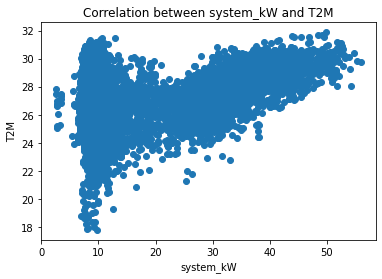

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot of the two columns
plt.scatter(df['system_kW'], df['T2M'])
plt.xlabel('system_kW')
plt.ylabel('T2M')
plt.title('Correlation between system_kW and T2M')

# show the plot
plt.show()


### REGRESSION ANALYSIS

In [ ]:
import pandas as pd
import statsmodels.api as sm

# create the independent variable X and the dependent variable y
X = df['T2M']
y = df['system_kW']

# add a constant to the independent variable
X = sm.add_constant(X)

# create the linear regression model
model = sm.OLS(y, X).fit()

# output the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              system_kW   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     2585.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:15:39   Log-Likelihood:                -32551.
No. Observations:                8729   AIC:                         6.511e+04
Df Residuals:                    8727   BIC:                         6.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.6225      1.458    -39.532      0.0

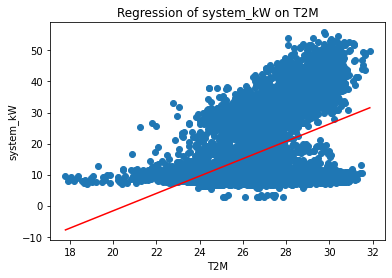

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create a scatter plot of the data
plt.scatter(X['T2M'], y)

# generate x-values for the regression line
x_line = np.linspace(X['T2M'].min(), X['T2M'].max(), 100)

# calculate the y-values for the regression line
y_line = model.params[0] + model.params[1] * x_line

# plot the regression line
plt.plot(x_line, y_line, color='red')

# add axis labels and a title
plt.xlabel('T2M')
plt.ylabel('system_kW')
plt.title('Regression of system_kW on T2M')

# show the plot
plt.show()


### SPEARMAN'S RANK

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# calculate the Spearman rank correlation coefficient and p-value
corr, pval = spearmanr(df['system_kW'], df['T2M'])

# print the results
print('Spearman rank correlation coefficient:', corr)
print('p-value:', pval)


Spearman rank correlation coefficient: 0.3599256948599208
p-value: 2.849418755987255e-265


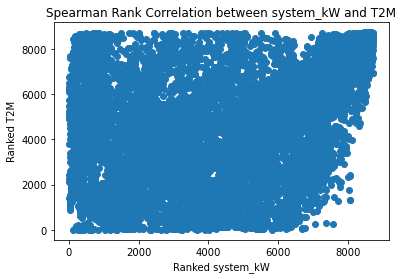

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# rank the data
ranked_system_kW = stats.rankdata(df['system_kW'])
ranked_T2M = stats.rankdata(df['T2M'])

# create a scatter plot of the ranked data
plt.scatter(ranked_system_kW, ranked_T2M)
plt.xlabel('Ranked system_kW')
plt.ylabel('Ranked T2M')
plt.title('Spearman Rank Correlation between system_kW and T2M')

# show the plot
plt.show()

### KENDALL'S TAU

In [ ]:
import pandas as pd
from scipy.stats import kendalltau

# calculate Kendall's tau coefficient and p-value
corr, pval = kendalltau(df['system_kW'], df['T2M'])

# print the results
print("Kendall's tau coefficient:", corr)
print('p-value:', pval)


Kendall's tau coefficient: 0.25323713777238577
p-value: 2.723005147027279e-275


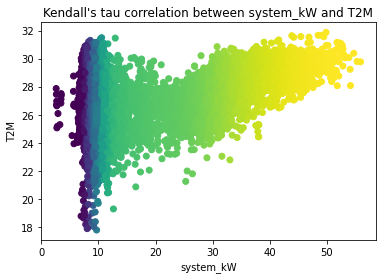

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# rank the data
ranked_system_kW = stats.rankdata(df['system_kW'])
ranked_T2M = stats.rankdata(df['T2M'])

# create a scatter plot of the data with points colored according to their ranks
plt.scatter(df['system_kW'], df['T2M'], c=ranked_system_kW)
plt.xlabel('system_kW')
plt.ylabel('T2M')
plt.title("Kendall's tau correlation between system_kW and T2M")

# show the plot
plt.show()


### 95% level of significance

In [ ]:
from scipy.stats import spearmanr, kendalltau
import numpy as np

spearman_corr, spearman_p = spearmanr(df.system_kW, df.T2M)

# compute Kendall's tau coefficient and p-value
kendall_corr, kendall_p = kendalltau(df.system_kW, df.T2M)

# check significance level
alpha = 0.05

# print the results
print("Spearman's rank correlation coefficient:", spearman_corr)
print("p-value:", spearman_p)
if spearman_p <= alpha:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")

print("Kendall's tau coefficient:", kendall_corr)
print("p-value:", kendall_p)
if kendall_p <= alpha:
    print("There is a significant correlation between the variables.")
else:
    print("There is no significant correlation between the variables.")


Spearman's rank correlation coefficient: 0.3599256948599208
p-value: 2.849418755987255e-265
There is a significant correlation between the variables.
Kendall's tau coefficient: 0.25323713777238577
p-value: 2.723005147027279e-275
There is a significant correlation between the variables.


### ANOVA

In [ ]:
import scipy.stats as stats

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(df.system_kW, df.T2M)

# Print the results
print("F-value:", f_value)
print("p-value:", p_value)


F-value: 6623.246695267254
p-value: 0.0


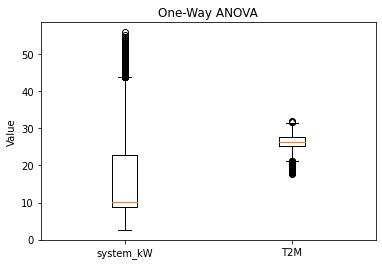

In [ ]:
import matplotlib.pyplot as plt

# create a boxplot of the two columns
plt.boxplot([df['system_kW'], df['T2M']])
plt.xticks([1, 2], ['system_kW', 'T2M'])
plt.ylabel('Value')
plt.title('One-Way ANOVA')

# show the plot
plt.show()

### Chi-square

In [ ]:
import pandas as pd
import scipy.stats as stats

# Create categories for each variable
system_kW_categories = pd.cut(df.system_kW, bins=3, labels=["low", "medium", "high"])
T2M_categories = pd.cut(df.T2M, bins=3, labels=["low", "medium", "high"])

# Create a contingency table
contingency_table = pd.crosstab(system_kW_categories, T2M_categories)

# Perform chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-square value: 1797.7092523638596
p-value: 0.0
Degrees of freedom: 4
Expected frequencies:
 [[ 126.23714057 4187.97250544 2129.79035399]
 [  31.79436362 1054.79195784  536.41367854]
 [  12.96849582  430.23553672  218.79596746]]


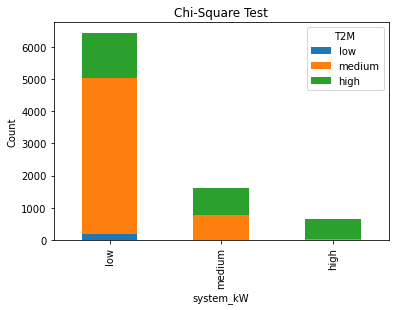

In [ ]:
import matplotlib.pyplot as plt

# create a stacked bar chart of the contingency table
contingency_table.plot(kind='bar', stacked=True)

plt.title('Chi-Square Test')
plt.xlabel('system_kW')
plt.ylabel('Count')
plt.legend(title='T2M', loc='upper right')

# show the plot
plt.show()


### Wilcoxon signed-rank

In [ ]:
import scipy.stats as stats

# Perform Wilcoxon signed-rank test
statistic, p_value = stats.wilcoxon(df.system_kW, df.T2M)

# Print the results
print("Wilcoxon signed-rank statistic:", statistic)
print("p-value:", p_value)


Wilcoxon signed-rank statistic: 3923753.0
p-value: 0.0


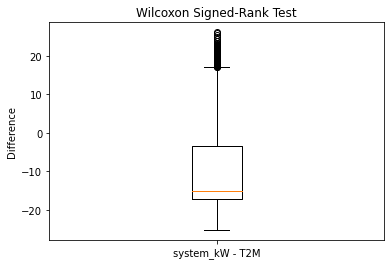

In [ ]:
import matplotlib.pyplot as plt

# create a boxplot of the difference between the two variables
diff = df.system_kW - df.T2M
plt.boxplot(diff)

plt.title('Wilcoxon Signed-Rank Test')
plt.ylabel('Difference')
plt.xticks([1], ['system_kW - T2M'])

# show the plot
plt.show()


### Model Development

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:

# # Load the data into a Pandas dataframe
# df = pd.read_csv("df_for_ml.csv", parse_dates=['Time'], index_col='Time')

# # Scale the data using a MinMaxScaler
# scaler = MinMaxScaler()
# data = scaler.fit_transform(df)

# # Define the number of time steps to use for each prediction
# n_steps = 4

# # Split the data into training and testing sets
# train_size = int(len(data) * 0.8)
# train_data = data[:train_size]
# test_data = data[train_size:]

# # Define the function to create the input and output sequences
# def create_sequences(data, n_steps):
#     X = []
#     y = []
#     for i in range(n_steps, len(data)):
#         X.append(data[i-n_steps:i])
#         y.append(data[i, 0])
#     return np.array(X), np.array(y)

# # Create the input and output sequences for the training and testing data
# X_train, y_train = create_sequences(train_data, n_steps)
# X_test, y_test = create_sequences(test_data, n_steps)

# # Define the LSTM model
# model = Sequential([
#     LSTM(units=50, activation='relu', return_sequences=True, input_shape=(n_steps, 2)),
#     LSTM(units=50, activation='relu'),
#     Dense(units=1)
# ])

# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=10)

# # Evaluate the model on the testing data
# loss = model.evaluate(X_test, y_test)

# print('Test Loss:', loss)

# # Make predictions on the testing data
# predictions = model.predict(X_test)

# # Invert the scaling of the predictions and actual values
# predictions = scaler.inverse_transform(np.concatenate((np.zeros((n_steps, 1)), predictions), axis=0))[:, 1]
# actual_values = scaler.inverse_transform(np.concatenate((np.zeros((n_steps, 1)), y_test.reshape(-1, 1)), axis=0))[:, 1]



In [ ]:
df = pd.read_csv("ml_df.csv",index_col='Time',parse_dates=True)


In [ ]:
df

,system_kW
Time,
2020-01-01 20:00:00,9.852
2020-01-01 21:00:00,9.836
2020-01-01 22:00:00,11.481
2020-01-01 23:00:00,11.418
2020-01-02 00:00:00,9.166
...,...
2021-01-02 15:00:00,11.242
2021-01-02 16:00:00,11.237
2021-01-02 17:00:00,11.178


In [ ]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected=True)

cf.go_offline()

In [ ]:
df.reset_index().iplot(kind='line', x='Time',y='system_kW')


In [ ]:
train = df.iloc[:6983]
test = df.iloc[6983:]

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(                     system_kW
 Time                          
 2020-01-01 20:00:00      9.852
 2020-01-01 21:00:00      9.836
 2020-01-01 22:00:00     11.481
 2020-01-01 23:00:00     11.418
 2020-01-02 00:00:00      9.166,                      system_kW
 Time                          
 2021-01-02 15:00:00     11.242
 2021-01-02 16:00:00     11.237
 2021-01-02 17:00:00     11.178
 2021-01-02 18:00:00     11.147
 2021-01-02 19:00:00     11.075)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.1357823  0.13548181 0.16637557]
Predict this y: 
 [[0.16519241]]


In [ ]:

X.shape


(1, 3, 1)

In [ ]:

# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# fit model
model.fit(generator,epochs=200)

Epoch 1/100
6971/6971 [==============================] - 53s 7ms/step - loss: 0.0095
Epoch 2/100
6971/6971 [==============================] - 53s 8ms/step - loss: 0.0063
Epoch 3/100
6971/6971 [==============================] - 75s 11ms/step - loss: 0.0056
Epoch 4/100
6971/6971 [==============================] - 74s 11ms/step - loss: 0.0053
Epoch 5/100
6971/6971 [==============================] - 71s 10ms/step - loss: 0.0052
Epoch 6/100
6971/6971 [==============================] - 75s 11ms/step - loss: 0.0050
Epoch 7/100
6971/6971 [==============================] - 69s 10ms/step - loss: 0.0050
Epoch 8/100
6971/6971 [==============================] - 67s 10ms/step - loss: 0.0049
Epoch 9/100
6971/6971 [==============================] - 61s 9ms/step - loss: 0.0049
Epoch 10/100
6971/6971 [==============================] - 57s 8ms/step - loss: 0.0048
Epoch 11/100
6971/6971 [==============================] - 55s 8ms/step - loss: 0.0048
Epoch 12/100
6971/6971 [==============================] -

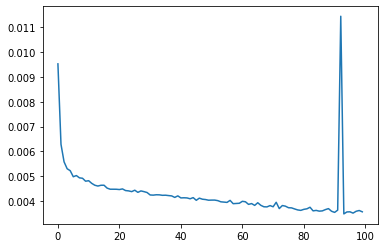

In [ ]:

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]


In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:

model.predict(last_train_batch)

1/1 [==============================] - 0s 282ms/step


array([[0.09267366]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.08246474])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
test_predictions


[array([0.09267366], dtype=float32),
 array([0.10156975], dtype=float32),
 array([0.10801391], dtype=float32),
 array([0.12218904], dtype=float32),
 array([0.13239062], dtype=float32),
 array([0.1324765], dtype=float32),
 array([0.127094], dtype=float32),
 array([0.12075349], dtype=float32),
 array([0.1162802], dtype=float32),
 array([0.11581326], dtype=float32),
 array([0.11971501], dtype=float32),
 array([0.12044457], dtype=float32),
 array([0.12003805], dtype=float32),
 array([0.12043508], dtype=float32),
 array([0.12074395], dtype=float32),
 array([0.12554112], dtype=float32),
 array([0.13518506], dtype=float32),
 array([0.14797404], dtype=float32),
 array([0.16349933], dtype=float32),
 array([0.18299481], dtype=float32),
 array([0.2068744], dtype=float32),
 array([0.24245006], dtype=float32),
 array([0.3188305], dtype=float32),
 array([0.4000314], dtype=float32),
 array([0.44837967], dtype=float32),
 array([0.48206252], dtype=float32),
 array([0.47567672], dtype=float32),
 array([

In [ ]:
test.head()

,system_kW
Time,
2020-10-21 23:00:00,7.013
2020-10-22 00:00:00,7.010
2020-10-22 01:00:00,6.997
2020-10-22 02:00:00,7.007
2020-10-22 03:00:00,6.903


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='Time'>

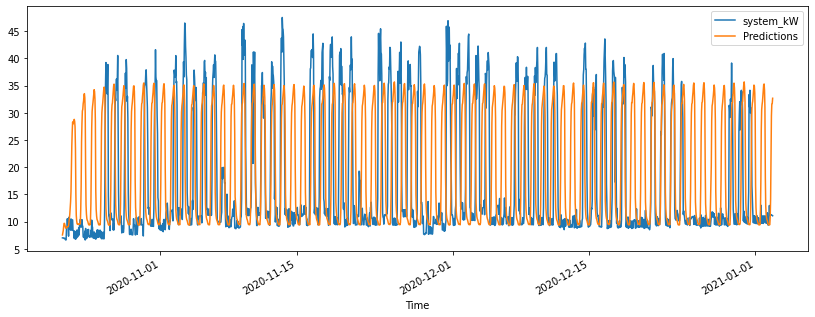

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['system_kW'],test['Predictions']))
print(rmse)

15.525101322019022
